In [1]:
from flickplay.mongo import get_mongo_db_obj
from flickplay.get_connections import get_pymysql_con
import pandas as pd
import sys
import datetime

In [2]:
conp = get_pymysql_con()
db = get_mongo_db_obj()

In [3]:
print('Getting experiences')

de = pd.DataFrame.from_records(db.experiences.find({'nft': True}))

print('Getting Recordings')

dr = pd.DataFrame.from_records(db.recordings.find())

Getting experiences
Getting Recordings


In [4]:
import sys

idxes = []
ids = []

UltraLux De soi
Hand Accessory	Lux Gold
Hand Accessory	Gold De soi
Hand Accessory	Lux Lune
Hand Accessory	Lux Hour
Hand Accessory	Champignon

for idx, row in de.iterrows():
    try:
        for thing in row.nftProperties:
            for s in thing.values():
                s = str(s).lower()
                if 'de soi' in s or 'lux' in s or 'champignon' in s:
                    print(idx)
                    idxes.append(idx)
                    ids.append(row._id)
    except TypeError:
        pass
            
    if idx%300==0:
        sys.stdout.write(f'{idx}\r')

220
229
232
235
237
239
242
247
281
292
313
316
317
321
329
336
340
345
355
358
359
362
363
373
374
376
382
401
403
420
437
450
457
461
476
484
488
492
519
528
547
550
551
552
560
566
567
574
576
577
584
590
614
615
624
639
648
657
659
715
716
717
719
721
728
733
735
746
754
758
768
770
782
783
801
805
811
812
826
833
841
842
847
850
853
862
870
872
874
878
884
885
891
908
911
942
943
955
963
974
976
981
983
985
995
997
1002
1003
1018
1019
1026
1030
1031
1045
1047
1051
1052
1053
1054
1057
1066
1067
1068
1069
1073
1075
1080
1084
1086
1087
1091
1092
1097
1099
1115
1124
1129
1132
1141
1142
1144
1145
1147
1148
1155
1159
1160
1164
1166
1174
1179
1203
1222
1233
1235
1245
1246
1260
1261
1269
1278
1283
1298
1307
1310
1324
1328
1331
1354
1359
1368
1370
1376
1385
1389
1390
1393
1396
1397
1398
1399
1421
1425
1431
1459
1465
1468
1472
1475
1486
1488
1494
1498
1511
1515
1519
1529
1530
1539
1541
1544
1549
1551
1554
1558
1559
1565
1568
1571
1575
1580
1581
1591
1594
1599
1600
1609
1617
1618
1619
1620
1

In [24]:
de.iloc[0].nftProperties

[{'propertyCategory': 'Name',
  'property': 'Lights',
  'value': 0.16666667,
  '_id': ObjectId('63884ee05534985e8a6556e9'),
  'propertyCategoryId': ObjectId('63884b8b5534987295655628'),
  'propertyId': ObjectId('63884d34ee26c3d7eab955f0'),
  'reward': None},
 {'propertyCategory': 'Color',
  'property': 'Multi',
  'value': 0.33333333333,
  '_id': ObjectId('63884eedee26c334f6b95672'),
  'propertyCategoryId': ObjectId('63884b9c553498238a65562b'),
  'propertyId': ObjectId('63884cb4553498ec7f655640'),
  'reward': None},
 {'propertyCategory': 'Season',
  'property': 'Christmas',
  'value': 1,
  '_id': ObjectId('63884efaee26c3193db95678'),
  'propertyCategoryId': ObjectId('63884c88ee26c3f00cb955aa'),
  'propertyId': ObjectId('63884cc3553498f636655643'),
  'reward': None},
 {'propertyCategory': 'Shape',
  'property': 'Heart',
  'value': 0.16666667,
  '_id': ObjectId('63884f0a55349818836556fb'),
  'propertyCategoryId': ObjectId('63884cd35534988251655650'),
  'propertyId': ObjectId('63884ddfee26

In [5]:
desoi = de[de._id.isin(ids)]

In [31]:
d=desoi[desoi.name.str.contains('Flick')]
d['num']=d.name.apply(lambda x: int(x.split('#')[-1].strip()))
d['n'] = d.num.astype(int)
d[d.n<2223]

,_id,location,name,subtitle,placeholderKey,artist,placenote,active,restricted,image1x,...,userRewardedId,preview,annotations,nftLastImportedAt,tokenAddressIndex,tokenIdIndex,nftImportVersion,nftImportedAt,num,n
220,627eb73a652a70e1f0647e2f,NaN,Flicky #18,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,18,18
229,627eb743652a70e1f0647eb3,NaN,Flicky #27,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,27,27
232,627eb74635f753a4b06e9084,NaN,Flicky #30,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,30,30
235,627eb748652a70e1f0647f0d,NaN,Flicky #33,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,33,33
237,627eb748652a70e1f0647f24,NaN,Flicky #35,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,35,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2401,627eb7c435f753a4b06eeee0,NaN,Flicky #2199,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,2199,2199
2402,627eb7c4652a70e1f064dbf6,NaN,Flicky #2200,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,2200,2200
2408,627eb7c435f753a4b06eef23,NaN,Flicky #2206,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,2206,2206
2421,627eb7c5652a70e1f064dd00,NaN,Flicky #2219,None,NaN,None,NaN,True,True,NaN,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,2219,2219


In [8]:
CA = '0xe36f5350b097ea72e561ee154b45363c808a56d2'

#ids = de[de.tokenAddress==CA]._id
idsd = set(desoi._id.values)

recordings = []
outof = len(dr)


for idx, recording in dr.iterrows():
    

        
    for exp in recording.experiences:
        if exp in idsd:
            recordings.append(recording._id)
    
    
    if idx%100:
        sys.stdout.write(f'\r{idx} out of {outof}')
        
print('\n',len(recordings))

15402 out of 15403
 949


In [9]:
desoi_recordings = dr[dr._id.isin(recordings)]

In [13]:
desoi_recordings

,_id,video,thumbnail,hashtags,hashtagIds,mentions,text,published,likes,shares,...,locationName,locationId,smallIcon,smallThumbnail,mapThumbnail,musicId,musicTitle,musicArtist,scorePointsV2,disneyBoost
10927,62c7943c9aab1bc7fffc6b4e,{'name': 'raw-v-34AC97FC-0299-4AAE-8B16-6AAD1C...,{'name': 'raw-v-34AC97FC-0299-4AAE-8B16-6AAD1C...,[],[],[],Looks at my Flicky!\n👇👇👇\nhttps://opensea.io/c...,True,32,0,...,NaN,6070c63fd5c9fd7881250b39,users/5e39a3832a7ba9457211e0c5/videos/thumbnai...,users/5e39a3832a7ba9457211e0c5/videos/thumbnai...,users/5e39a3832a7ba9457211e0c5/mapThumbnail/79...,62a7e142419c0c5e6b7d85cf,Happy,FlickPlay Original Song,NaN,NaN
10928,62c7946aff6514d74a8ac29b,{'name': 'raw-v-02FDD00A-B6F7-4613-8187-77D741...,{'name': 'raw-v-02FDD00A-B6F7-4613-8187-77D741...,[],[],[],WOOOOO!!,True,41,0,...,NaN,None,users/5df1201474236794fbe087bb/videos/thumbnai...,users/5df1201474236794fbe087bb/videos/thumbnai...,None,62a7e0c131735c1eab3eb549,Neutral,FlickPlay Original Song,NaN,NaN
10933,62c79e798e5de50bd77cbaef,{'name': 'raw-v-2DF0B655-94FF-47C1-8480-BBB252...,{'name': 'raw-v-2DF0B655-94FF-47C1-8480-BBB252...,[#FLICKY],[628d1f5d67fcca3eb33efa78],[],Check that #FLICKY,True,31,0,...,NaN,None,users/62c789dfff6514c9fc8485a4/videos/thumbnai...,users/62c789dfff6514c9fc8485a4/videos/thumbnai...,None,6296a21d586f2b4368df6e97,Go Down Deh,"Spice, Shaggy, Sean Paul",NaN,NaN
10934,62c7a9d78a2be14f029c8472,{'name': 'raw-v-BA8F009D-53E3-476C-815E-766463...,{'name': 'raw-v-BA8F009D-53E3-476C-815E-766463...,[#flickplay],[5f03c474a1386e7e0d7c176f],[62c64646e3bc09d3fa418355],@danacakes210 #flickplay,True,18,0,...,NaN,None,users/6293081e82c92e0a0ca0fd92/videos/thumbnai...,users/6293081e82c92e0a0ca0fd92/videos/thumbnai...,None,62a7e29e31735c4dc93eb55b,Anime,FlickPlay Original Song,NaN,NaN
10936,62c7b558e49b8f8ba4864d9f,{'name': 'raw-v-A670432C-D767-4FEB-B2DC-9B7195...,{'name': 'raw-v-A670432C-D767-4FEB-B2DC-9B7195...,[#FLICKYGANG],[626d08994a4e9433225c961e],[],Flicky with his MAYC skateboard #FLICKYGANG,True,25,0,...,NaN,None,users/5eedb62f0d4758610b23e81e/videos/thumbnai...,users/5eedb62f0d4758610b23e81e/videos/thumbnai...,None,62a7e0c131735c1eab3eb549,Neutral,FlickPlay Original Song,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15373,63dfe41ac88e3319e581cfb5,{'name': 'raw-v-7791EFEE-8B04-4886-8D47-37F5BC...,{'name': 'raw-v-7791EFEE-8B04-4886-8D47-37F5BC...,[#flickygang],[6268050809f1d0fdfeb2c981],[],Downtown San Antonio Texas \n\n#flickygang,True,11,0,...,NaN,None,users/6293081e82c92e0a0ca0fd92/videos/thumbnai...,users/6293081e82c92e0a0ca0fd92/videos/thumbnai...,None,632361cd67fc846dd1a77cf3,Save That Shit,Lil Peep,-1.0,False
15378,63e009a8672e71ef4a9ff8b7,{'name': 'raw-v-94CA3A15-EA63-4369-A022-B679FB...,{'name': 'raw-v-94CA3A15-EA63-4369-A022-B679FB...,"[#rubik, #angry, #gang, #flicky, #flexit]","[63e009a8672e71ac0d9ff8b4, 6341d3e485e9bc9e114...",[],He hates this 😂 #rubik #angry #gang #flicky #f...,True,15,0,...,NaN,None,users/5fe75e70e4c3771937e169d4/videos/thumbnai...,users/5fe75e70e4c3771937e169d4/videos/thumbnai...,None,62a7e1e9419c0c03487d85d3,Angry,FlickPlay Original Song,-1.0,False
15389,63e13a9169d6427f280c7e33,{'name': 'raw-v-BB01636B-A3B4-4D9B-AC73-A55EB6...,{'name': 'raw-v-BB01636B-A3B4-4D9B-AC73-A55EB6...,[#FlickyLovesIt],[63e13a9169d6425cbf0c7e30],[],I love this place! #FlickyLovesIt,True,12,0,...,NaN,62d85bc7bad7061ccb788504,users/5ee9463955c2ec52d977680a/videos/thumbnai...,users/5ee9463955c2ec52d977680a/videos/thumbnai...,users/5ee9463955c2ec52d977680a/mapThumbnail/bf...,63daa2668ffcf63ec5cd8883,Smile Challenge - Trending Audio,Unknown,-1.0,False
15391,63e150bd69d6427b790cf5e8,{'name': 'raw-v-B392E53C-7FB7-45E3-9A0C-02B0E4...,{'name': 'raw-v-B392E53C-7FB7-45E3-9A0C-02B0E4...,"[#FlickyLovesIt, #Flickplaycreator, #flickplay...","[63e13a9169d6425cbf0c7e30, 602210db60ffb327169...",[],Me and my lovely flicky love our teacher jobs ...,True,10,0,...,NaN,None,users/63309ffe64c6f20ff9925f8d/vid

In [10]:
rec=desoi_recordings.created.apply(lambda x: x.month)
rec

10927    7
10928    7
10933    7
10934    7
10936    7
        ..
15373    2
15378    2
15389    2
15391    2
15401    2
Name: created, Length: 847, dtype: int64

In [21]:
de['_id_'] = de._id.apply(lambda x: str(x))
de['_id_']

0         5fc930ef62b3fc000dfb2043
1         5fc7e5f01a8d1c000d1c8ea5
2         5fc932a362b3fc000dfb2044
3         617f7cc7607679000d243130
4         619bb8fd0ce549000db11f76
                    ...           
130969    63e19c5886198e54f37f7e33
130970    63e19c5886198e54f37f7e36
130971    63e2456324bcfe9a84107f1b
130972    63e279bd0dbe8a8afaa2e834
130973    63e279c40dbe8a8afaa2e83b
Name: _id_, Length: 130974, dtype: object

In [15]:
len([x for x in rec.values if x==7])

232

Text(0.5, 0, 'month')

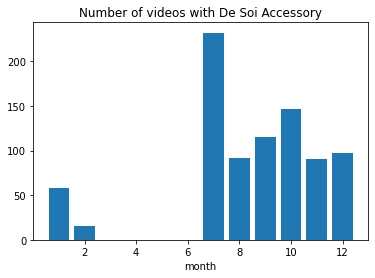

In [11]:
import matplotlib.pyplot as plt

rec=desoi_recordings.created.apply(lambda x: x.month)

months = [7,8,9,10,11,12,1,2]

nrecordings = []
for mo in months:
    n = len([ _ for _ in rec if _==mo])
    nrecordings.append(n)
    

plt.bar(months, nrecordings)
plt.title('Number of videos with De Soi Accessory')
plt.xlabel('month')

In [24]:
recordings

[]

In [25]:
len(recordings)

41

In [38]:
de['sname'] = de.name.astype(str)

In [42]:
de[de.sname.str.contains('Flick')].iloc[0].tokenAddress

'0x98b5ac33ab3342908d774fd107c9172bda94b8c3'

In [43]:
CA = '0x98b5ac33ab3342908d774fd107c9172bda94b8c3'

'''**Flicky Data**

- [https://flickplay.atlassian.net/browse/FLIC-5952](https://flickplay.atlassian.net/browse/FLIC-5952)
- How many wallets with Flicky connected on Flickplay this week?
- How many wallets with Flicky connected on Flickplay in July?
- How many videos created with Flicky in 2022?
- How many videos created with Flicky monthly from August to December?'''

ids = de[de.tokenAddress==CA]._id
recordings = []
outof = len(dr)


for idx, recording in dr.iterrows():
    

        
    for exp in recording.experiences:
        if str(exp) in [ str(i) for i in ids ]:
            recordings.append(recording._id)
    
    
    if idx%100:
        sys.stdout.write(f'\r{idx} out of {outof}')
        
print('\n',len(recordings))

15005 out of 15006
 3189


In [44]:
len(recordings)

3189

In [59]:
flicky_recordings = dr[dr._id.isin(recordings)]
flicky_recordings['_month'] = [ x.month for x in flicky_recordings.publishDate ]
flicky_recordings['_year'] = [ x.year for x in flicky_recordings.publishDate ]
flicky_recordings['_day'] = [ x.day for x in flicky_recordings.publishDate ]

/var/folders/n6/zc0mx_b953d7fmyh83yrflj40000gn/T/ipykernel_47191/2289079210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flicky_recordings['_month'] = [ x.month for x in flicky_recordings.publishDate ]
/var/folders/n6/zc0mx_b953d7fmyh83yrflj40000gn/T/ipykernel_47191/2289079210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flicky_recordings['_year'] = [ x.year for x in flicky_recordings.publishDate ]
/var/folders/n6/zc0mx_b953d7fmyh83yrflj40000gn/T/ipykernel_47191/2289079210.py:4: SettingWithCop

In [69]:
flicky_recordings.published

10898    True
10899    True
10909    True
10910    True
10911    True
         ... 
14999    True
15002    True
15003    True
15004    True
15005    True
Name: published, Length: 2548, dtype: bool

7 781
8 433
9 336
10 327
11 291
12 304


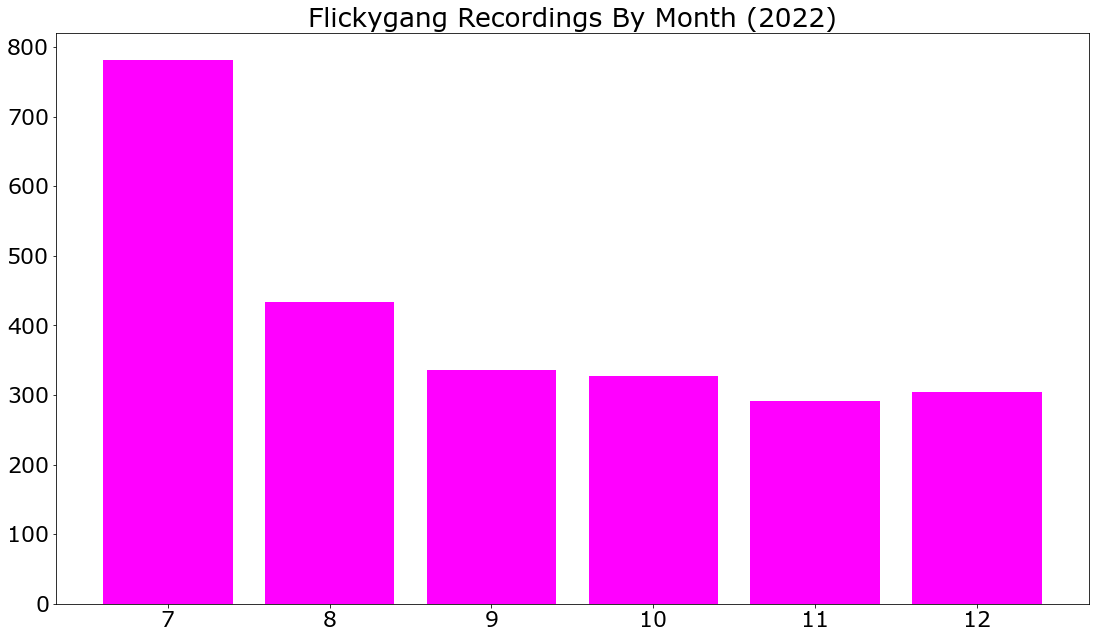

In [66]:
months = [7,8,9,10,11,12]
f_recordings = []
fp_recordings = []

fp = flicky_recordings[flicky_recordings.published==True ]
                       
for mo in months:
    
    n = len(flicky_recordings[flicky_recordings._month == mo])
    print(mo, n)
    f_recordings.append(n)
    
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(months, f_recordings, color='magenta')
#ax.xaxis.set_major_locator(mdates.MonthLocator())

# plt.xticks(rotation=70)
plt.title('Flickygang Recordings By Month (2022)')

plt.show()

In [68]:
len(recordings)

3189

month videos published
7 781 781
8 433 433
9 336 336
10 327 325
11 291 291
12 304 304


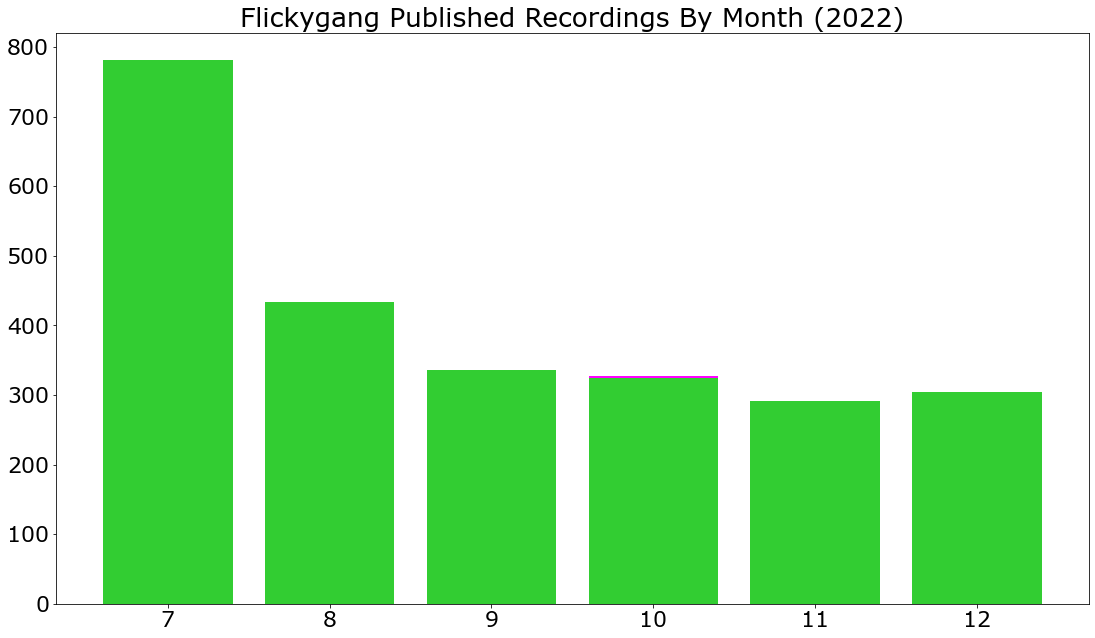

In [73]:
months = [7,8,9,10,11,12]
f_recordings = []
fp_recordings = []
print('month videos published')
fp = flicky_recordings[flicky_recordings.published==True ]
                       
for mo in months:
    
    n = len(flicky_recordings[flicky_recordings._month == mo])
    p = len(fp[fp._month == mo])
    print(mo, n, p)
    f_recordings.append(n)
    fp_recordings.append(p)
            
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(months, f_recordings, color='magenta')
ax.bar(months, fp_recordings, color='limegreen')
#ax.xaxis.set_major_locator(mdates.MonthLocator())

# plt.xticks(rotation=70)
plt.title('Flickygang Published Recordings By Month (2022)')

plt.show()

In [74]:
flicky_recordings.columns

Index(['_id', 'video', 'thumbnail', 'hashtags', 'hashtagIds', 'mentions',
       'text', 'published', 'likes', 'shares', 'comments', 'publishDate',
       'user', 'wall', 'metadata', 'created', 'photoCredit', 'keep',
       'chameleonPointsCount', 'experience', 'totalViewsCount',
       'boostViewsCount', 'experiences', 'flagCount', 'flagged',
       'scoreBoostPoints', 'scorePoints', 'viewsCount', 'watermarkedVideo',
       'saves', 'inhouse', 'musicOff', 'smallImagesVersion', '__v', 'device',
       'ios', 'appVersion', 'location', 'locationLabel', 'locationName',
       'locationId', 'smallIcon', 'smallThumbnail', 'mapThumbnail', 'musicId',
       'musicTitle', 'musicArtist', 'scorePointsV2', 'disneyBoost', '_month',
       '_year', '_day'],
      dtype='object')

In [81]:
set(de[de.tokenAddress==CA].nftOwnerWalletAddress)

{'0x01348f50406198ed37447a9cf2f0c28a6df6cce2',
 '0x020cc39c3479e6d39a02641f0a77931d75baac2d',
 '0x085f66d0764c632ce8c1f2a41531909bef106c75',
 '0x095699a376f78a7142af7c1453a4852dbdb0cede',
 '0x09ecf4fb1480bdc8aa722c30c8efc805df01ba4b',
 '0x0aab45d1b9c821ebfd03a77117c12355e8739c85',
 '0x0ab4e3a464719621bdce5858847745d3239b4bc2',
 '0x0caa1104bf40ee551dcc70e4ea4b9098e03020fa',
 '0x0d0bfe52364b64ecc627447a2aebed966f1a528f',
 '0x114c7dba538049260e3c4919e98447943f9f228a',
 '0x1159133eb90986eb137656c36f10363d2f3ca49b',
 '0x118b07bb40254aa7bc90d7a8c26d10bd32dd10a7',
 '0x125589bed43337f5fe34ddeb3152aa7ec2b3aba5',
 '0x128b79937a0ede33258992c9668455f997f1af24',
 '0x12d7a3fe8378e5afce12581fffa87d75855eb656',
 '0x13706b0c0fb41011b5b92339ccd36588bc06b635',
 '0x1394a6e19b976033c48862cf6d42db24ff30ba5a',
 '0x13c6df62ff6ed1530ef309b8c4cc8b8765d7ab6c',
 '0x13de432e8288ba2429677de8c206138d7337d97b',
 '0x141e149426b0c40dfa55de98452f04b7fb1b79f9',
 '0x148b1d41480d5b9479094ab985bf5ea96822cba9',
 '0x14ab119bd

In [82]:
from flickplay.get_connections import get_pymysql_con

conp = get_pymysql_con()

In [83]:
d = pd.read_sql("""
SELECT * FROM fpa.derived2 where 
event='profile_wallet__connect_suc'""", conp)

In [88]:
f_wallets = set(de[de.tokenAddress==CA].nftOwnerWalletAddress)

dd = d[d.wallet_address.isin(f_wallets)]

dd

,event,date,time,$user_id,user_gps_location,anon_user,wallet_address,month,day,week,dt,hour
0,profile_wallet__connect_suc,2022-04-21,1650558937,609d510c4244340b2a77c83a,None,0,0x27ca75df20f66cdf640bad45e9d9c0cd5b603bc4,4,111,16,2022-04-21 11:35:37,11
1,profile_wallet__connect_suc,2022-04-21,1650559435,609d510c4244340b2a77c83a,None,0,0x27ca75df20f66cdf640bad45e9d9c0cd5b603bc4,4,111,16,2022-04-21 11:43:55,11
5,profile_wallet__connect_suc,2022-04-22,1650652709,5df1201474236794fbe087bb,lat: 34.0362; long: -118.4701,0,0x9796887a49f411b79d0af891120337c6ecf736ac,4,112,16,2022-04-22 13:38:29,13
8,profile_wallet__connect_suc,2022-04-25,1650895932,626195afa209fff86dc94ee2,lat: 29.4498; long: -98.4945,0,0xd369cfe9eb7da55dbd5ca3f16e9d8f730de90f0a,4,115,17,2022-04-25 09:12:12,9
9,profile_wallet__connect_suc,2022-04-25,1650921883,6267019e556fe2a2c962b8c0,lat: 25.8067; long: -80.3342,0,0xef9cd08af131b3966d253478f8ed223fc3303761,4,115,17,2022-04-25 16:24:43,16
...,...,...,...,...,...,...,...,...,...,...,...,...
1757,profile_wallet__connect_suc,2022-12-27,1672152794,61807026238f2d3cabdf11d0,lat: 33.9778; long: -118.4079,0,0xe84a9d83ab79f05b44430a9f86c3a276532e4f34,12,361,52,2022-12-27 08:53:14,8
1759,profile_wallet__connect_suc,2022-12-27,1672141453,629920bd82692cece425b44e,lat: 38.8639; long: -76.9576,0,0x8297dcceca46195cfde0ec0684623233b9cc2270,12,361,52,2022-12-27 05:44:13,5
1768,profile_wallet__connect_suc,2022-12-29,1672325481,6262b5ce801ba557543ac90a,lat: -28.2255; long: 153.5408,0,0xe0eaef1fea3d52005e05c2d9b28a25e696714967,12,363,52,2022-12-29 08:51:21,8
1771,profile_wallet__connect_suc,2022-12-30,1672463916,62bf3b0b1cc78f2ab79f7479,None,0,0x53444ab9f6299edbe4919c63da28782cd1659dd2,12,364,52,2022-12-30 23:18:36,23


In [99]:
from flickplay.get_connections import get_alchemy_con

con = get_alchemy_con()

dd.to_sql('flickygang_connects',
           con,
           if_exists='append',
             index=False)

In [113]:
query = """
select 
    x.*, 
    month(x.date) month 
from
    (
    SELECT 
        wallet_address, 
        min(date) date
    FROM 
        fpa.flickygang_connects
    GROUP BY
        wallet_address
    ) x

"""

first_signon = pd.read_sql(query, conp)

first_signon.to_csv('/Users/allen/Desktop/first_signon_by_wallet.csv')

first_signon


,wallet_address,date,month
0,0x27ca75df20f66cdf640bad45e9d9c0cd5b603bc4,2022-04-21,4
1,0x9796887a49f411b79d0af891120337c6ecf736ac,2022-04-22,4
2,0xd369cfe9eb7da55dbd5ca3f16e9d8f730de90f0a,2022-04-25,4
3,0xef9cd08af131b3966d253478f8ed223fc3303761,2022-04-25,4
4,0xcb4af43671451324c153cc078e139bfe1e1766f8,2022-04-27,4
...,...,...,...
216,0x3572dba776de300dc0862750f592172dd36f799f,2022-10-12,10
217,0xabfb6f44fb802b8b07f3db55da001ab9231e44dc,2022-10-30,10
218,0x8788ac0714cd1c695b0160d77fee82974adb0fb4,2022-11-02,11
219,0xe84a9d83ab79f05b44430a9f86c3a276532e4f34,2022-12-24,12


In [120]:
sa = first_signon[['wallet_address', 'month']]#.groupby('month').count()


sa = sa.groupby('month').count()


sa.to_csv('/Users/allen/Desktop/first_signon_counts.csv')

print(sa)

       wallet_address
month                
4                   5
5                   6
6                  48
7                 124
8                  15
9                  16
10                  4
11                  1
12                  2


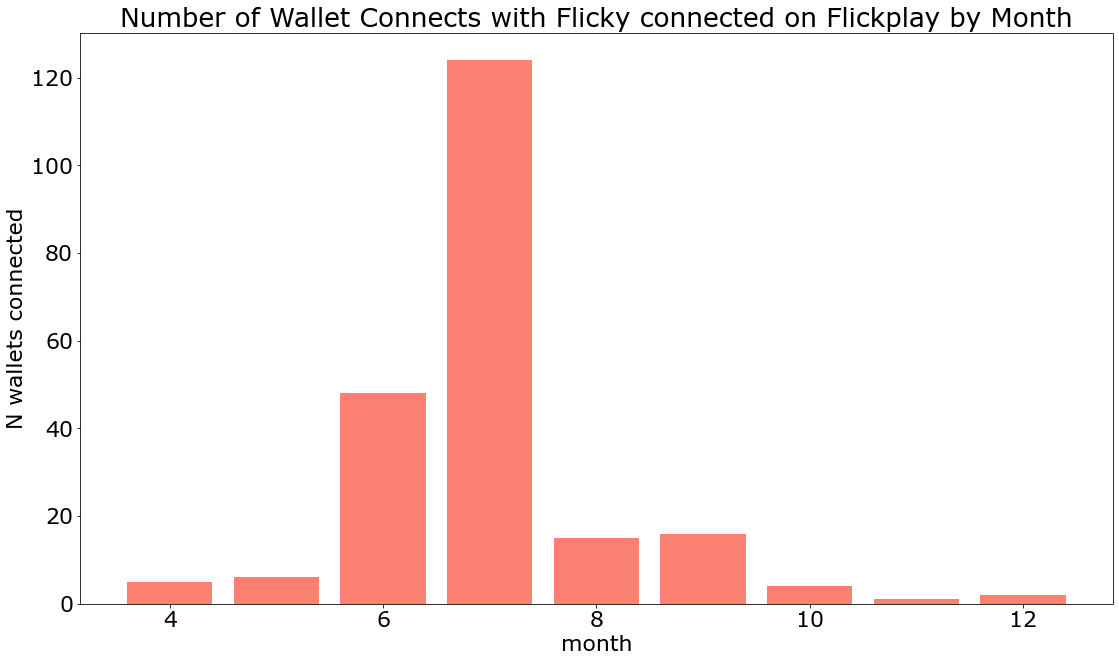

In [119]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

font = {'family' : 'verdana',
       # 'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(18.5, 10.5)

ax.bar(sa.index, sa.wallet_address, color='salmon')
# ax.bar(months, fp_recordings, color='limegreen')
#ax.xaxis.set_major_locator(mdates.MonthLocator())

# plt.xticks(rotation=70)
plt.title('Number of Wallet Connects with Flicky connected on Flickplay by Month')
plt.xlabel('month')
plt.ylabel('N wallets connected')
plt.show()

In [94]:
for wa in f_wallets:
    print(wa, min(dd[dd.wallet_address==wa].date))

0xa62e1a29bd8b10ee19bec9d6f4d76de4e0cad2dc 2022-09-02
0x9faa6716461bdf53229beaccd9d284ea41ba4450 2022-07-02
0xd417d5cc5dfd013fb1773a9b6cd4913c2aa754bd 2022-07-07
0x114c7dba538049260e3c4919e98447943f9f228a 2022-06-21


ValueError: min() arg is an empty sequence

In [33]:
low_end = [
    "63bdcf966e703359486c3852",
    "63b8837b955644d552edfd6c",
    "63bda2fd6e703359486c3850",
    "63bda30c6e703359486c3851"]

high_end = [
    "63b72847955644d552edfd69",
    "63b72847955644d552edfd69"]

